# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [153]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bkamalnivas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bkamalnivas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bkamalnivas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/bkamalnivas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [41]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv('NEWS_API_KEY')

In [42]:
# Create a newsapi client
newsapi = NewsApiClient(news_api_key)

In [45]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language="en")

In [69]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language="en")

In [193]:
eth_articles['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Emma Roth',
 'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
 'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
 'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
 'publishedAt': '2022-04-14T21:43:57Z',
 'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'}

In [150]:
#get sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

#function to return df
def create_df(news):
    df = pd.DataFrame(columns=['date', 'title', 'text', 
                               'title_compound', 'title_pos', 'title_neu', 'title_neg', 'title_sent', 
                               'text_compound', 'text_pos', 'text_neu', 'text_neg', 'text_sent'])

    for article in news:
        try:
            date = article["publishedAt"][:10]
            title = article["title"]
            text = article["content"]

            title_sentiment = analyzer.polarity_scores(article["title"])
            text_sentiment = analyzer.polarity_scores(article["content"])
            
            title_sent_comp = title_sentiment["compound"]
            title_sent_pos = title_sentiment["pos"]
            title_sent_neu = title_sentiment["neu"]
            title_sent_neg = title_sentiment["neg"]
            title_sent_sent = get_sentiment(title_sentiment["compound"])
            
            text_sent_comp = text_sentiment["compound"]
            text_sent_pos = text_sentiment["pos"]
            text_sent_neu = text_sentiment["neu"]
            text_sent_neg = text_sentiment["neg"]
            text_sent_sent = get_sentiment(text_sentiment["compound"])
            
            df = df.append({
                "date": date,
                "title": title,
                "text": text,
        
                "title_compound": title_sent_comp,
                "title_pos": title_sent_pos,
                "title_neu": title_sent_neu,
                "title_neg": title_sent_neg,
                "title_sent": title_sent_sent,
                        
                "text_compound": text_sent_comp,
                "text_pos": text_sent_pos,
                "text_neu": text_sent_neu,
                "text_neg": text_sent_neg,
                "text_sent": text_sent_sent,
                
                }, ignore_index=True)
        except AttributeError:
            pass
    
    return df
    

In [160]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(btc_articles['articles'])

btc_df.head()

,date,title,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-05-04,Why fossil fuel companies see green in Bitcoin...,A Bitcoin mining site powered by otherwise los...,0.0000,0.0,1.000,0.000,0,-0.0516,0.056,0.882,0.061,-1
1,2022-04-08,Block and Blockstream are partnering with Tesl...,Its set to open later this year\r\nIf you buy ...,-0.4404,0.0,0.828,0.172,-1,-0.4404,0.000,0.919,0.081,-1
2,2022-04-14,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,-0.4404,0.0,0.674,0.326,-1,0.4019,0.088,0.912,0.000,1
3,2022-05-02,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,0.0000,0.0,1.000,0.000,0,-0.3269,0.085,0.772,0.143,-1
4,2022-04-06,This might be Jack Dorsey’s ‘rockey’ hardware ...,The wallet will have USB-C and a fingerprint r...,0.0000,0.0,1.000,0.000,0,-0.4404,0.000,0.912,0.088,-1


In [161]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_df(eth_articles['articles'])

eth_df.head()

,date,title,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-14,US blames North Korean hacker group for $625 m...,The US Department of Treasury says Lazarus is ...,-0.4019,0.000,0.803,0.197,-1,-0.7845,0.088,0.681,0.231,-1
1,2022-04-13,Wikipedia community votes to stop accepting cr...,"18 with 15 posters participating, including st...",0.1027,0.241,0.556,0.204,1,0.1027,0.084,0.844,0.071,1
2,2022-04-15,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...",0.0000,0.000,1.000,0.000,0,0.7351,0.188,0.812,0.000,1
3,2022-05-02,Yuga Labs apologises after sale of virtual lan...,A multi-billion dollar cryptocurrency company ...,0.2023,0.167,0.833,0.000,1,-0.2263,0.046,0.879,0.075,-1
4,2022-05-04,How Bored Ape Yacht Club Broke Ethereum - CNET,When Bored Ape Yacht Club creators Yuga Labs a...,-0.5994,0.000,0.550,0.450,-1,-0.2732,0.000,0.945,0.055,-1


In [162]:
# Describe the Bitcoin Sentiment
'''
btc_mean_pos = btc_df['text_pos'].mean()
btc_max_comp = btc_df['text_compound'].max()
btc_max_pos = btc_df['text_pos'].max()
'''

btc_df.describe()


,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.009030,0.081750,0.854500,0.063800,0.064900,0.082150,0.857650,0.060150
std,0.283137,0.129012,0.177731,0.118875,0.447480,0.073902,0.095334,0.067019
min,-0.440400,0.000000,0.470000,0.000000,-0.690800,0.000000,0.557000,0.000000
25%,0.000000,0.000000,0.769500,0.000000,-0.286625,0.000000,0.810750,0.000000
50%,0.000000,0.000000,0.935000,0.000000,0.025800,0.081000,0.871500,0.063000
75%,0.109025,0.175750,1.000000,0.043000,0.424900,0.143500,0.919750,0.078750
max,0.599400,0.457000,1.000000,0.349000,0.750600,0.202000,1.000000,0.241000


In [98]:
# Describe the Ethereum Sentiment

eth_df.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.014790,0.059500,0.875850,0.064700,-0.051160,0.058600,0.878800,0.062550
std,0.300065,0.097386,0.148526,0.120199,0.444470,0.087277,0.097754,0.069811
min,-0.599400,0.000000,0.550000,0.000000,-0.784500,0.000000,0.651000,0.000000
25%,0.000000,0.000000,0.787750,0.000000,-0.273200,0.000000,0.824750,0.000000
50%,0.000000,0.000000,0.931500,0.000000,-0.165500,0.023000,0.921000,0.059000
75%,0.127600,0.138750,1.000000,0.094000,0.144925,0.079500,0.939000,0.076250
max,0.557400,0.254000,1.000000,0.450000,0.932700,0.349000,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [180]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

sw.add('char')
sw.add('editor')
sw.add('april')
sw.add('reuters')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bkamalnivas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # convert string to lower case
    text = text.lower()
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words] 
    
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [189]:
# Create a master text doc for each coin

btc_master_text = ''
eth_master_text = ''

for article in btc_articles['articles']:
    btc_master_text = btc_master_text + ' ' + article["content"] + article["description"]
    
for article in eth_articles['articles']:
    eth_master_text = eth_master_text + ' ' + article["content"] + article["description"]

btc_tokens = tokenizer(btc_master_text)
eth_tokens = tokenizer(eth_master_text)


In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [190]:
from collections import Counter
from nltk import ngrams

In [191]:
# Generate the Bitcoin N-grams where N=2
btc_gram = ngrams(btc_tokens, n=2)
top_10 = dict(Counter(btc_gram).most_common(10))
btc_gram_df = pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

btc_gram_df

,bigram,count
0,"(jack, dorsey)",4
1,"(credit, card)",4
2,"(wikimedia, foundation)",3
3,"(bitcoin, reserve)",3
4,"(reserve, currency)",3
5,"(ha, adopted)",3
6,"(adopted, bitcoin)",3
7,"(legal, tender)",3
8,"(bitcoin, mining)",2
9,"(voted, favor)",2


In [192]:
# Generate the Ethereum N-grams where N=2
eth_gram = ngrams(eth_tokens, n=2)
top_10 = dict(Counter(eth_gram).most_common(10))
eth_gram_df = pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

eth_gram_df

,bigram,count
0,"(wa, sentenced)",4
1,"(sentenced, five)",4
2,"(five, year)",4
3,"(north, korea)",4
4,"(evade, u)",4
5,"(ha, promised)",4
6,"(bored, ape)",3
7,"(ape, yacht)",3
8,"(yacht, club)",3
9,"(u, department)",2


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [185]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('bitcoin', 15),
 ('cryptocurrency', 7),
 ('ha', 6),
 ('may', 4),
 ('online', 4),
 ('company', 4),
 ('jack', 3),
 ('announced', 3),
 ('thursday', 3),
 ('world', 3)]

In [186]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('cryptocurrency', 8),
 ('ha', 7),
 ('year', 6),
 ('ethereum', 5),
 ('bitcoin', 5),
 ('u', 4),
 ('browser', 4),
 ('nft', 4),
 ('north', 3),
 ('crypto', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

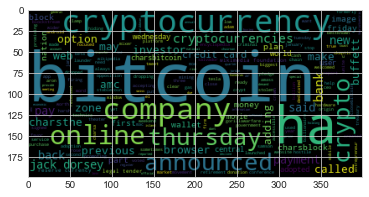

In [205]:
# Generate the Bitcoin word cloud
btc_tokens_str = ' '.join(btc_tokens)
btc_wc = WordCloud().generate(btc_tokens_str)
plt.imshow(btc_wc)

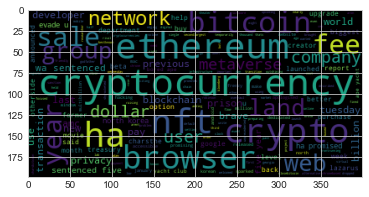

In [206]:
# Generate the Ethereum word cloud
eth_tokens_str = ' '.join(eth_tokens)
eth_wc = WordCloud().generate(eth_tokens_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [207]:
import spacy
from spacy import displacy

In [215]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [210]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [212]:
# Concatenate all of the Bitcoin text together
#btc_master_text

In [224]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_master_text)

In [220]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [214]:
# Concatenate all of the Ethereum text together
#eth_master_text

In [222]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_master_text)

In [223]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [227]:
# List all Entities
entities = [{ent.text:} for ent in eth_doc.ents]

eth_doc.ents

(The US Department of Treasury,
 The US Treasury Department,
 North Korean,
 $625 million,
 Ronin,
 chars]The US Department of Treasury,
 625,
 North Korean,
 18,
 15,
 More than 200,
 Wikipedia,
 the Wikimedia Foundation,
 Opera,
 Crypto Browser,
 January,
 Windows, Mac,
 Android,
 Crypto Browser,
 January,
 Windows, Mac,
 Android,
 Ethereum,
 Yuga Labs,
 Otherside,
 Ethereum,
 Yacht Club,
 Yuga Labs,
 Otherside NFT,
 April 30,
 NFT,
 hours,
 thousands,
 Ethereum,
 more than five years,
 100,000,
 North Korea,
 US,
 NBC News,
 Ethereum,
 more than five years,
 100,000,
 North Korea,
 US,
 April 26,
 Reuters,
 No.2,
 Ethereum,
 second,
 second,
 Chrome,
 Brave,
 Chrome,
 Brave,
 AMC,
 April 15,
 AMC,
 Adam Aron,
 AMC,
 April 15,
 AMC,
 Adam Aron,
 Doge,
 Last night,
 Bloomberg,
 nearly a third,
 a billion dollars,
 Last night,
 Bloomberg,
 nearly a third,
 a billion dollars,
 Early this week,
 the Ukrainian Computer Emergency Response Team,
 Slovakian,
 Russia,
 NSO Group,
 Telegram,
 

---